In [2]:
import pandas as pd
from tqdm import trange
import pymorphy2
import matplotlib.pyplot as plt

import iterator

С использованием средств библиотеки Pandas прочитать все данные (в DataFrame будет несколько столбцов, в зависимости от варианта, например, у варианта 10 - Количество звезд, Текст рецензии).

In [14]:
def create_table()-> pd.DataFrame:
    """create a df"""
    number_star = []
    text_opinion = []
    for i in range(1,6):
        iterator_work = iterator.Iterator("classmates1.csv", i)
        for j in trange(len(iterator.Iterator("classmates1.csv", i).list)):
            number_star.append(i)
            text_opinion.append(read_file(iterator.Iterator("classmates1.csv", i).list[j]))
    df = pd.DataFrame({
    'star': number_star,
    'text': text_opinion})
    return df


def read_file(elem: str)->str:
    """"reading a data from csv"""
    if elem != "['Абсолютный путь к файлу,Относительный путь к файлу,номер звезды']":
        directory = str(elem).split(",")
        #print(len(directory))
        if len(directory) == 3:
            with open(directory[1], "r") as f:
                text = f.read()
            
            return text     
    return None


df=create_table()

100%|██████████| 660/660 [00:11<00:00, 56.43it/s]


Произвести проверку на наличие невалидных значений в колонках (NaN, None и т.п.). В случае нахождения выполнить обработку таких значений.

In [4]:
def check_table(df:pd.DataFrame)->None:
    """check table to correct value"""
    print("checking")
    df=df.dropna()
    print(df.info())
    return df
df=check_table(df)


checking
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3800 entries, 0 to 3799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   star    3800 non-null   int64 
 1   text    3800 non-null   object
dtypes: int64(1), object(1)
memory usage: 89.1+ KB
None


Добавить в DataFrame столбец, который будет содержать информацию о кол-ве слов в ячейке, содержащей текстовую информацию.

In [5]:
def add_column(df)-> pd.DataFrame:
    """add_column in df """
    print("add_column")
    number_symbols_text = []
    for i in trange(len(df)):
        number_symbols_text.append(len(df.text[i]))

    df.insert(2, "len_text", number_symbols_text, False)
    return df
df=add_column(df)

add_column


100%|██████████| 3800/3800 [00:00<00:00, 17186.84it/s]


С использованием Pandas вычислить статистическую информацию для столбцов, содержащих числовую информацию.

In [78]:
def statistic(df: pd.DataFrame)-> None:
    """statistic in star"""
    print(df.describe())

statistic(df)

              star     len_text
count  3800.000000  3800.000000
mean      2.326316   370.025263
std       1.552399    71.258062
min       1.000000   157.000000
25%       1.000000   325.000000
50%       2.000000   361.000000
75%       4.000000   406.000000
max       5.000000   844.000000


Написать функцию, которая на вход принимает DataFrame и количество слов, а возвращает отфильтрованный по количеству слов DataFrame. Условие фильтрации - в новый DataFrame включаются те строки, для которых значение в столбце с количеством слов  ≤  заданного значения.

In [6]:
def sorted_table(df: pd.DataFrame,count_words: int)->None:
    """sorted_tabel on width words"""
    df=df[df['len_text'] > count_words][['star', 'text','len_text']]
    print(df)
    return df

df=sorted_table(df,350)

      star                                               text  len_text
1        1  Испытываю ЧУВСТВО НЕНАВИСТИ еще с 90-х когда в...       478
2        1  Обман кредитных карт сбербанка\n\nДостоинства:...       439
3        1  Перестал работать сервис выставления счетов, т...       446
6        1  Молчуны, снимут деньги и не заметишь\n\nДостои...       383
7        1  Политика сбербанка оставила меня без жилья!\n\...       399
...    ...                                                ...       ...
3792     5  Спасибо Сбербанку! Я сама виновата, что сглупи...       430
3794     5  Отличный банк с выгодными предложениями!\n\nДо...       383
3796     5  Отличный банк\n\nДостоинства: Удобный сервис, ...       391
3797     5  Вернули украденные с карты 27.12.2019 деньги\n...       404
3798     5  Отлично\n\nДостоинства: Оперативность\nНедоста...       364

[2178 rows x 3 columns]


Написать функцию, которая на вход принимает DataFrame и метку класса (например, Количество звезд), а возвращает отфильтрованный по заданной метке DataFrame.

In [8]:
def table_star(df: pd.DataFrame, number_star: int)->None:
    """Sorted table"""
    print(df[df['star']==number_star])
    return df[df['star']==number_star]

    
df=table_star(df,4)

      star                                               text  len_text
2800     4  Очень приятный персонал\n\nДостоинства: Работа...       354
2803     4  Быстрое обслуживание, большое просторное отдел...       450
2805     4  Почему я выбираю Сбербанк уже 10 лет\n\nДостои...       459
2806     4  Неплохо, но и не отлично\n\nДостоинства: Хорош...       382
2807     4  Не плохо\n\nДостоинства: Относительно не больш...       365
...    ...                                                ...       ...
3132     4  Ремонт не избавил от очередей.\n\nДостоинства:...       372
3133     4  Сбербанк  улучшил качество обслуживания клиент...       433
3136     4  Для такого огромного банка безалаберные сотруд...       380
3137     4  Не ожидала, что может быть не так, как раньше\...       368
3138     4  Не понимаю систему,по которой они работают.\n\...       369

[226 rows x 3 columns]


Выполнить группировку DataFrame по метке класса с вычислением максимального, минимального и среднего значения по количеству слов.

In [9]:
def table_star_statistic(df: pd.DataFrame, number_star: int)-> None:
    """print df where star== number_star"""
    df=df[df['star']==number_star]
    print(df)
    print("кол-во слов:\nmin: " + str(df["len_text"].min()) + "\nmean: " + str(df["len_text"].mean()) 
    + "\nmax: " + str(df["len_text"].max()) )

table_star_statistic(df,4)

      star                                               text  len_text
2800     4  Очень приятный персонал\n\nДостоинства: Работа...       354
2803     4  Быстрое обслуживание, большое просторное отдел...       450
2805     4  Почему я выбираю Сбербанк уже 10 лет\n\nДостои...       459
2806     4  Неплохо, но и не отлично\n\nДостоинства: Хорош...       382
2807     4  Не плохо\n\nДостоинства: Относительно не больш...       365
...    ...                                                ...       ...
3132     4  Ремонт не избавил от очередей.\n\nДостоинства:...       372
3133     4  Сбербанк  улучшил качество обслуживания клиент...       433
3136     4  Для такого огромного банка безалаберные сотруд...       380
3137     4  Не ожидала, что может быть не так, как раньше\...       368
3138     4  Не понимаю систему,по которой они работают.\n\...       369

[226 rows x 3 columns]
кол-во слов:
min: 351
mean: 417.8893805309734
max: 642


Написать функцию, которая на вход принимает DataFrame и метку класса, а возвращает гистограмму для слов. Для расчета гистограммы необходимо будет разбить блоки текста на слова и выполнить процедуру лемматизации для каждого слова (используя библиотеку nltk).

In [16]:
def create_hist(df : pd.DataFrame)-> list:
    """Lemitization and counter words"""
    #df=df[df['star']==number_star]
    words = []
    morph = pymorphy2.MorphAnalyzer()
    print("Обрабатываем кол-во слов")
    for i in trange(len(df['text'])):
        words = df.text[i].split() # разбиваем текст на слова
        for word in words:
            p = morph.parse(word)[0]
            words.append(p.normal_form)
    lonely_words=list(set(words))
    print(lonely_words)    
    #return words

create_hist(df)

Обрабатываем кол-во слов


  0%|          | 0/3800 [00:11<?, ?it/s]


KeyboardInterrupt: 

Выполнить визуализацию гистограммы, полученной из пункта 9, с помощью средств библиотеки matplotlib. Соответствующие оси, графики и значения необходимо подписать.

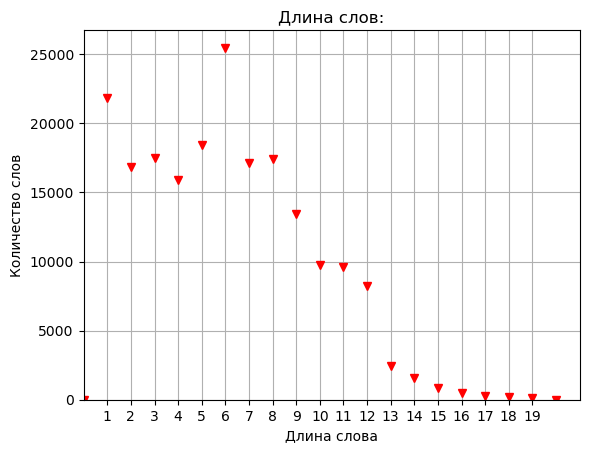

In [69]:
def print_histogram(len_words: list)->None:
    """print histogram on based list"""
    len_words.insert(0,0)
    plt.plot(range(21),len_words,'vr')
    plt.ylabel('Количество слов')
    plt.xlabel('Длина слова')
    plt.title('Длина слов:')
    plt.grid(True)
    plt.xticks(range(1,20))
    plt.xlim(0)
    plt.ylim(0)
    plt.show()

print_histogram(len_words)